In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
data = pd.read_csv('PG_2007_2017.csv', index_col = 'Date')

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


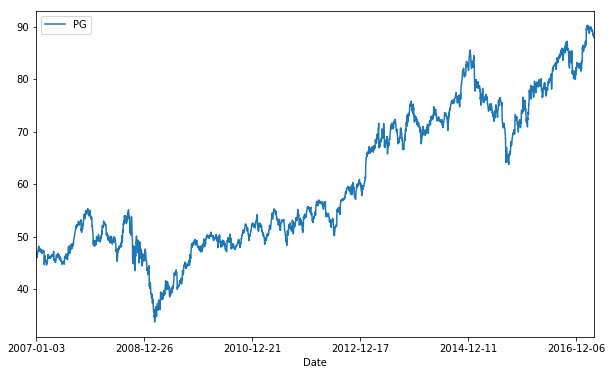

In [5]:
data.plot(figsize=(10, 6));

In [6]:
r = 0.025

In [7]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176109
dtype: float64

In [8]:
type(stdev)

pandas.core.series.Series

In [9]:
stdev = stdev.values
stdev

array([ 0.17610875])

In [10]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

In [11]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in xrange(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [12]:
S

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 88.56755864,  88.29538296,  88.05938578, ...,  88.97184182,
         89.60988713,  88.74943074],
       [ 88.62627254,  88.95204812,  89.84774125, ...,  88.99800572,
         88.8614557 ,  89.5504554 ],
       ..., 
       [ 84.72907025,  94.82441312,  85.75456853, ...,  70.05056987,
         67.62445882,  96.58956833],
       [ 84.96018742,  94.09189651,  86.12208818, ...,  70.18690148,
         67.75075809,  97.29714225],
       [ 84.94540828,  93.46857554,  87.29934735, ...,  70.48593686,
         69.46944912,  95.67947602]])

In [13]:
S.shape

(251L, 10000L)

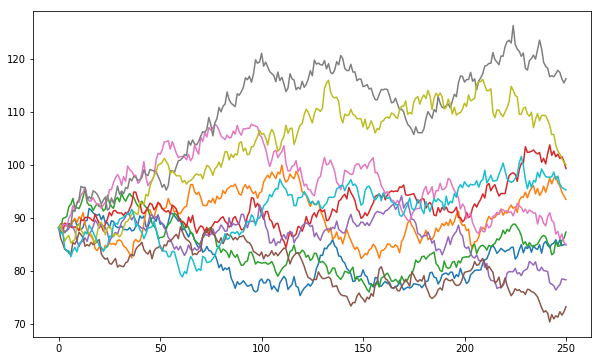

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

******

In [15]:
p = np.maximum(S[-1] - 110, 0)

In [16]:
p

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [17]:
p.shape

(10000L,)

In [18]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

1.159769289926591